# OBJECTIVE: EXPLORE THE CREDIT CARD DATASET AND THEN GROUPING THEM INTO VARIOUS CLUSTERS USING KMEANS, SPECTRUAL CLUSTERING AND MEANSHIFT.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

pd.options.display.float_format = '{:.5f}'.format

In [2]:
DF=pd.read_csv(r'https://raw.githubusercontent.com/asrarahmed01/Datasets/master/CC%20GENERAL.csv')

In [3]:
DF.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90075,0.81818,95.40000,0.00000,95.40000,0.00000,0.16667,0.00000,0.08333,0.00000,0,2,1000.00000,201.80208,139.50979,0.00000,12
1,C10002,3202.46742,0.90909,0.00000,0.00000,0.00000,6442.94548,0.00000,0.00000,0.00000,0.25000,4,0,7000.00000,4103.03260,1072.34022,0.22222,12
2,C10003,2495.14886,1.00000,773.17000,773.17000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0,12,7500.00000,622.06674,627.28479,0.00000,12
3,C10004,1666.67054,0.63636,1499.00000,1499.00000,0.00000,205.78802,0.08333,0.08333,0.00000,0.08333,1,1,7500.00000,0.00000,nan,0.00000,12
4,C10005,817.71434,1.00000,16.00000,16.00000,0.00000,0.00000,0.08333,0.08333,0.00000,0.00000,0,1,1200.00000,678.33476,244.79124,0.00000,12


In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
DF.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8949.00000,8950.00000,8637.00000,8950.00000,8950.00000
mean,1564.47483,0.87727,1003.20483,592.43737,411.06764,978.87111,0.49035,0.20246,0.36444,0.13514,3.24883,14.70983,4494.44945,1733.14385,864.20654,0.15371,11.51732
std,2081.53188,0.23690,2136.63478,1659.88792,904.33812,2097.16388,0.40137,0.29834,0.39745,0.20012,6.82465,24.85765,3638.81573,2895.06376,2372.44661,0.29250,1.33833
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,50.00000,0.00000,0.01916,0.00000,6.00000
25%,128.28192,0.88889,39.63500,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,1.00000,1600.00000,383.27617,169.12371,0.00000,12.00000
50%,873.38523,1.00000,361.28000,38.00000,89.00000,0.00000,0.50000,0.08333,0.16667,0.00000,0.00000,7.00000,3000.00000,856.90155,312.34395,0.00000,12.00000
75%,2054.14004,1.00000,1110.13000,577.40500,468.63750,1113.82114,0.91667,0.30000,0.75000,0.22222,4.00000,17.00000,6500.00000,1901.13432,825.48546,0.14286,12.00000
max,19043.13856,1.00000,49039.57000,40761.25000,22500.00000,47137.21176,1.00000,1.00000,1.00000,1.50000,123.00000,358.00000,30000.00000,50721.48336,76406.20752,1.00000,12.00000


In [6]:
DF=DF.fillna(DF.mean())  #filling missing values with the mean of the respective columns
DF=DF.drop("CUST_ID",axis=1)   #dropping CUST_ID column

In [7]:
DF.iloc[7215]

BALANCE                            1175.89599
BALANCE_FREQUENCY                     1.00000
PURCHASES                           154.38000
ONEOFF_PURCHASES                    154.38000
INSTALLMENTS_PURCHASES                0.00000
CASH_ADVANCE                         37.19737
PURCHASES_FREQUENCY                   0.08333
ONEOFF_PURCHASES_FREQUENCY            0.08333
PURCHASES_INSTALLMENTS_FREQUENCY      0.00000
CASH_ADVANCE_FREQUENCY                0.08333
CASH_ADVANCE_TRX                      1.00000
PURCHASES_TRX                         2.00000
CREDIT_LIMIT                       4000.00000
PAYMENTS                           1909.16192
MINIMUM_PAYMENTS                    426.23708
PRC_FULL_PAYMENT                      0.08333
TENURE                               12.00000
Name: 7215, dtype: float64

**Normalizing Input Values and PCA**

In [8]:
scale = StandardScaler()
X = scale.fit_transform(DF)

X_df=pd.DataFrame(X,columns=DF.columns)

pca = PCA(2)  #2 PCA's for visualization purposes
X_PCA=pca.fit_transform(X)

X_PCA_df=pd.DataFrame(X_PCA,columns=["PCA_1","PCA_2"])

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**Train Data**

In [9]:
PCA_df_Train=X_PCA_df.sample(frac=.8,random_state=100).reset_index()

PCA_df_Test=X_PCA_df[~X_PCA_df.index.isin(PCA_df_Train.index)].reset_index()

DF_Train=DF[DF.index.isin(PCA_df_Train["index"].values)]

DF_Test=DF[~DF.index.isin(PCA_df_Train["index"].values)]

In [10]:
print(PCA_df_Train.shape)
print(DF_Train.shape)
print(PCA_df_Test.shape)
print(DF_Test.shape)
PCA_df_Train[["PCA_1","PCA_2"]].head()

(7160, 3)
(7160, 17)
(1790, 3)
(1790, 17)


,PCA_1,PCA_2
0,-0.30199,0.07588
1,-1.38055,1.14024
2,1.31200,-1.87441
3,0.86659,2.03751
4,0.10125,-1.78463


**MODELING (ELBOW PLOT AND KMEANS)**

In [11]:
Inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k).fit(PCA_df_Train)
    Inertia.append([k, kmeans.inertia_])

Inertia=np.array(Inertia)  
print(Inertia)

[[1.00000000e+00 4.79931662e+10]
 [2.00000000e+00 1.19422665e+10]
 [3.00000000e+00 5.28644980e+09]
 [4.00000000e+00 3.00088622e+09]
 [5.00000000e+00 1.91004062e+09]
 [6.00000000e+00 1.31551710e+09]
 [7.00000000e+00 9.84193024e+08]
 [8.00000000e+00 7.53182846e+08]
 [9.00000000e+00 5.85761379e+08]
 [1.00000000e+01 4.75891546e+08]
 [1.10000000e+01 3.93651845e+08]
 [1.20000000e+01 3.31118683e+08]
 [1.30000000e+01 2.81143556e+08]
 [1.40000000e+01 2.43723784e+08]]


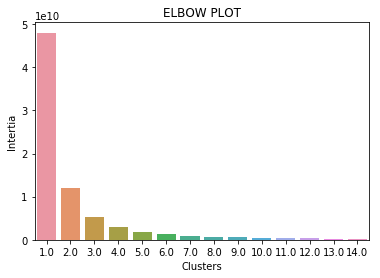

In [12]:
sns.barplot(Inertia[:,0],Inertia[:,1])
plt.title("ELBOW PLOT")
plt.ylabel("Intertia")
plt.xlabel("Clusters")
plt.show()

**CHOOSING 4 CLUSTERS**

In [13]:
kmean= KMeans(4)
kmean.fit(PCA_df_Train[["PCA_1","PCA_2"]])
labels=kmean.labels_
centroids=kmean.cluster_centers_

centroids

array([[ 1.01595714, -1.14379884],
       [-1.35144362, -0.20595883],
       [ 6.42847816,  0.79381672],
       [-0.56360536,  3.4590637 ]])

**Visualizaiton of Clusters (Analysis of Original Features)**

In [14]:
PCA_df_Train["CLUSTERS"]=pd.Series(labels)
DF_Train["CLUSTERS"]=pd.Series(labels)

DF_Train.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.90075,0.81818,95.40000,0.00000,95.40000,0.00000,0.16667,0.00000,0.08333,0.00000,0,2,1000.00000,201.80208,139.50979,0.00000,12,1.00000
1,3202.46742,0.90909,0.00000,0.00000,0.00000,6442.94548,0.00000,0.00000,0.00000,0.25000,4,0,7000.00000,4103.03260,1072.34022,0.22222,12,1.00000
3,1666.67054,0.63636,1499.00000,1499.00000,0.00000,205.78802,0.08333,0.08333,0.00000,0.08333,1,1,7500.00000,0.00000,864.20654,0.00000,12,3.00000
4,817.71434,1.00000,16.00000,16.00000,0.00000,0.00000,0.08333,0.08333,0.00000,0.00000,0,1,1200.00000,678.33476,244.79124,0.00000,12,0.00000
5,1809.82875,1.00000,1333.28000,0.00000,1333.28000,0.00000,0.66667,0.00000,0.58333,0.00000,0,8,1800.00000,1400.05777,2407.24604,0.00000,12,1.00000


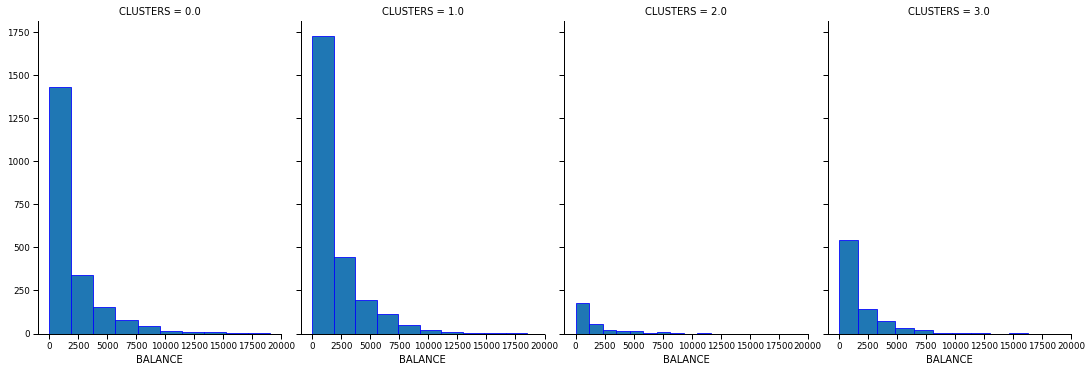

BALANCE


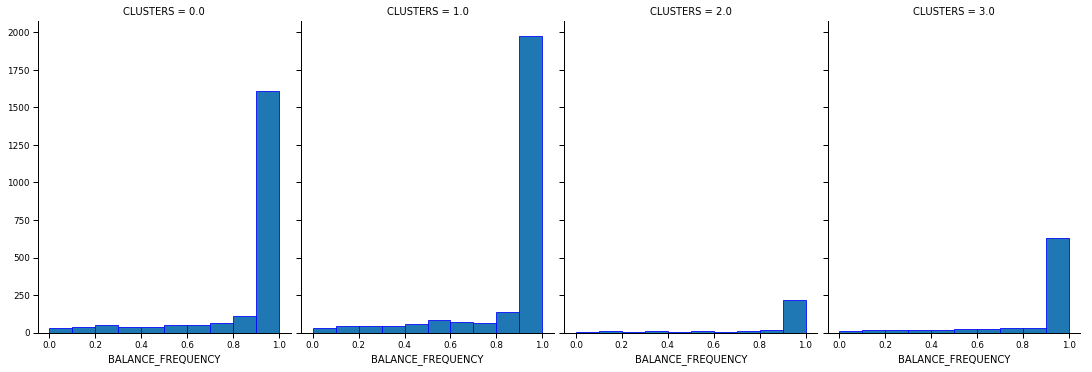

BALANCE_FREQUENCY


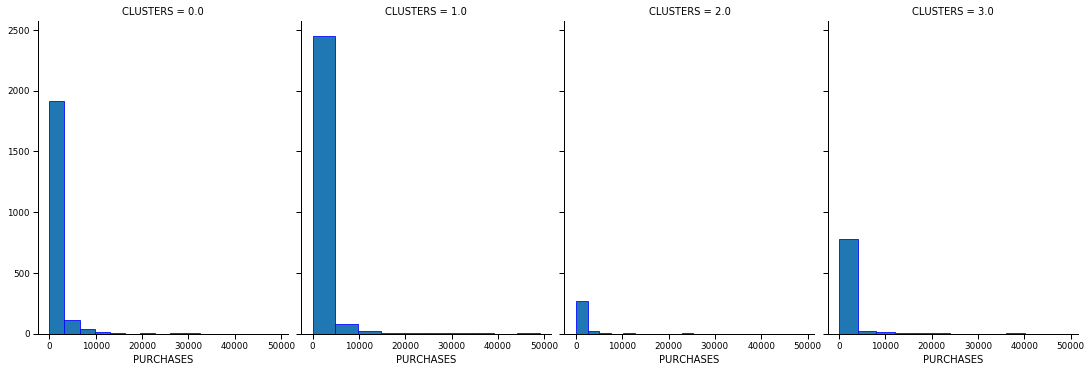

PURCHASES


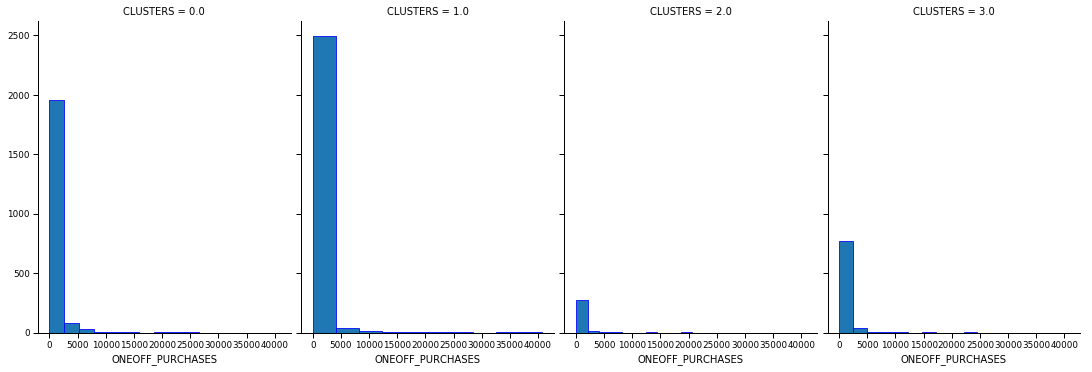

ONEOFF_PURCHASES


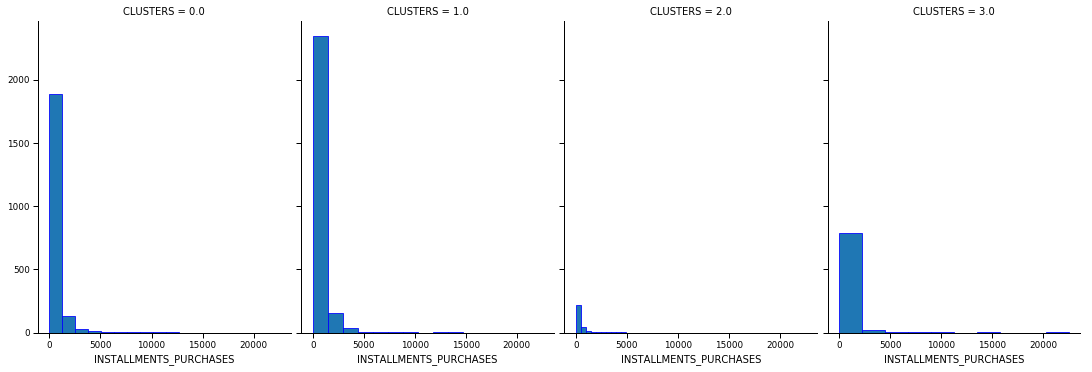

INSTALLMENTS_PURCHASES


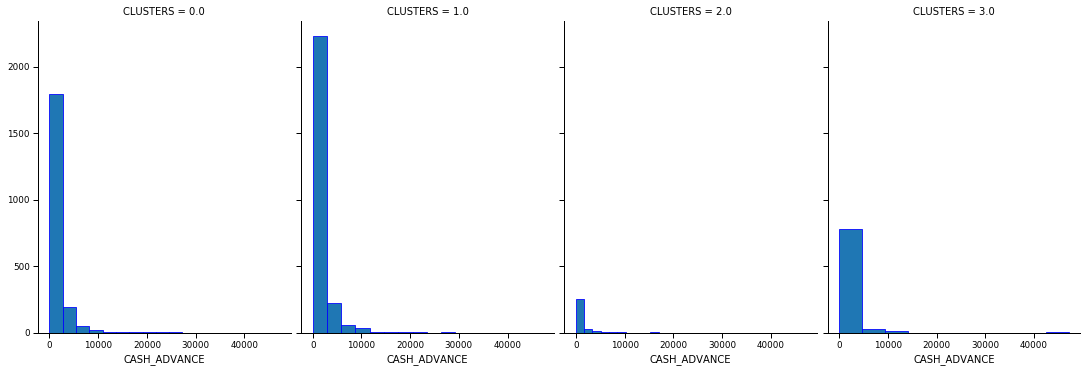

CASH_ADVANCE


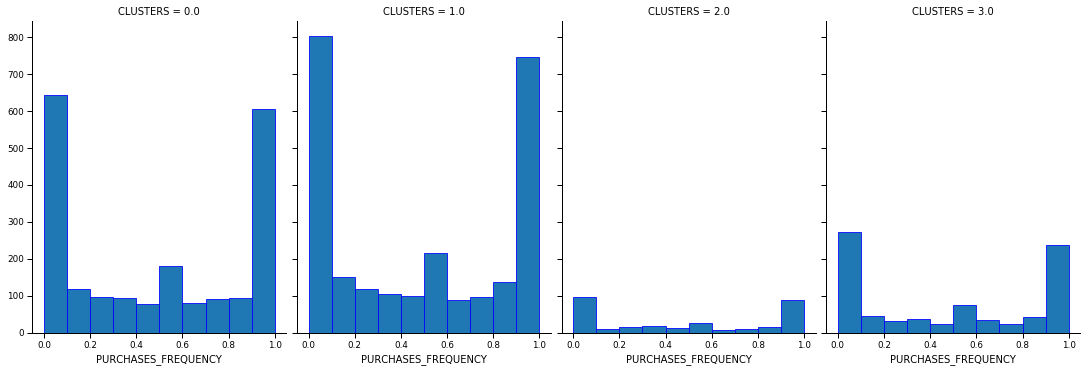

PURCHASES_FREQUENCY


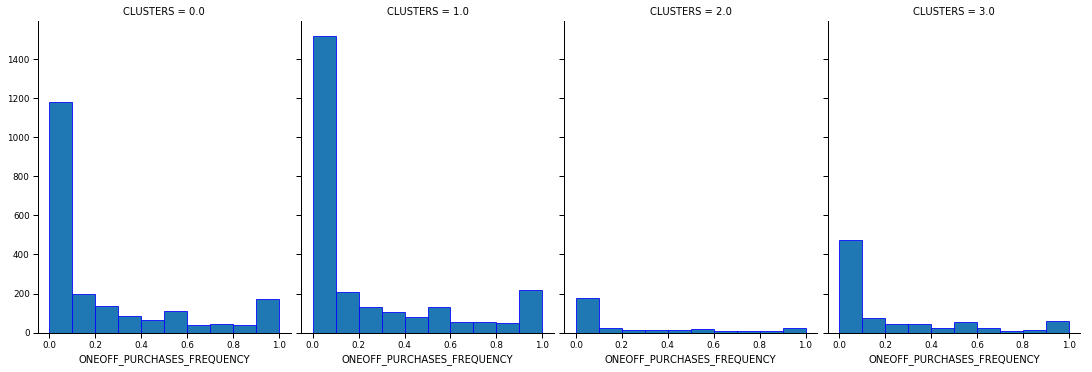

ONEOFF_PURCHASES_FREQUENCY


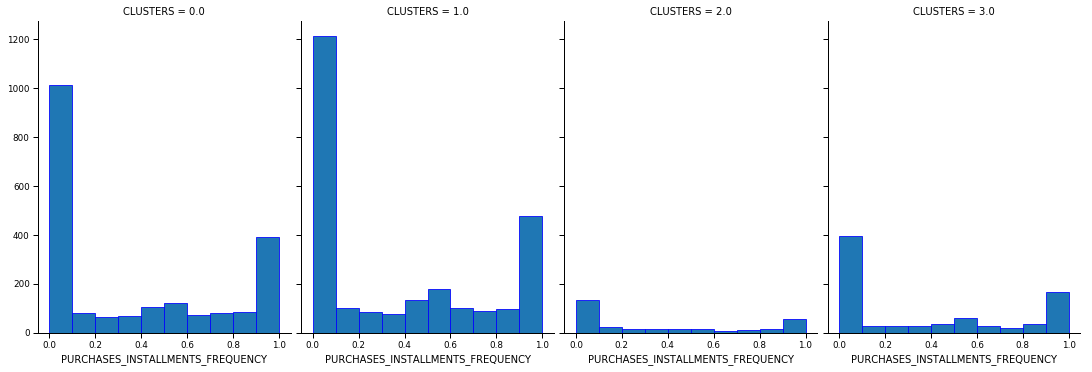

PURCHASES_INSTALLMENTS_FREQUENCY


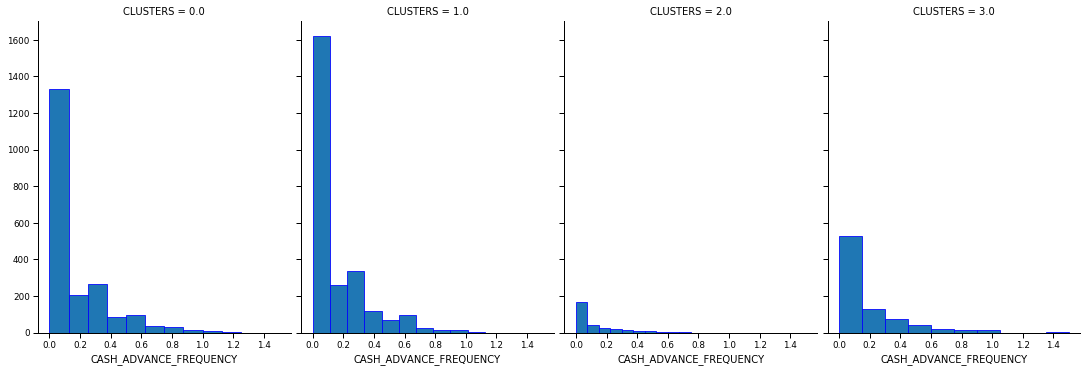

CASH_ADVANCE_FREQUENCY


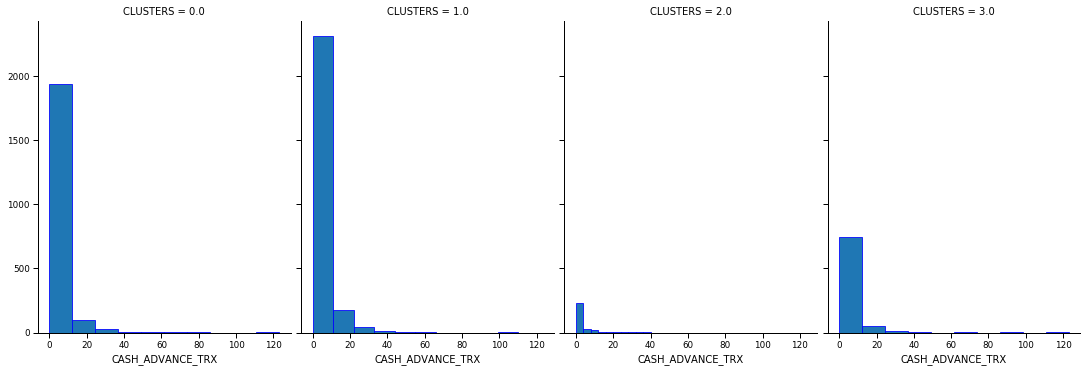

CASH_ADVANCE_TRX


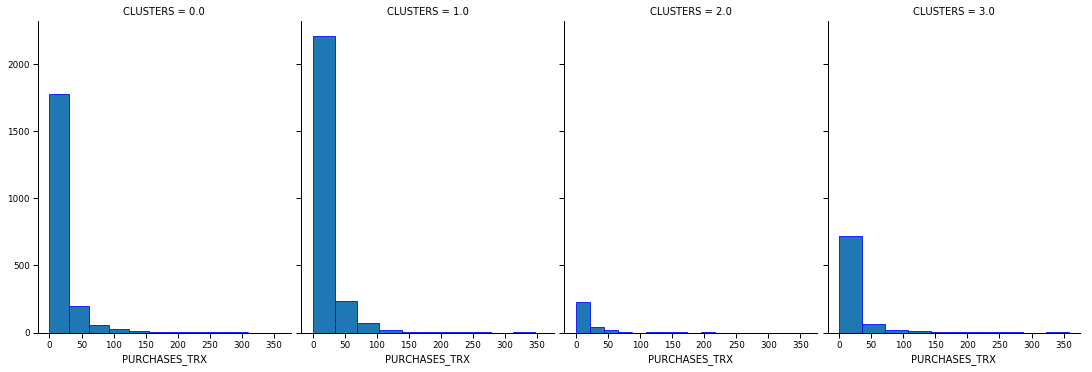

PURCHASES_TRX


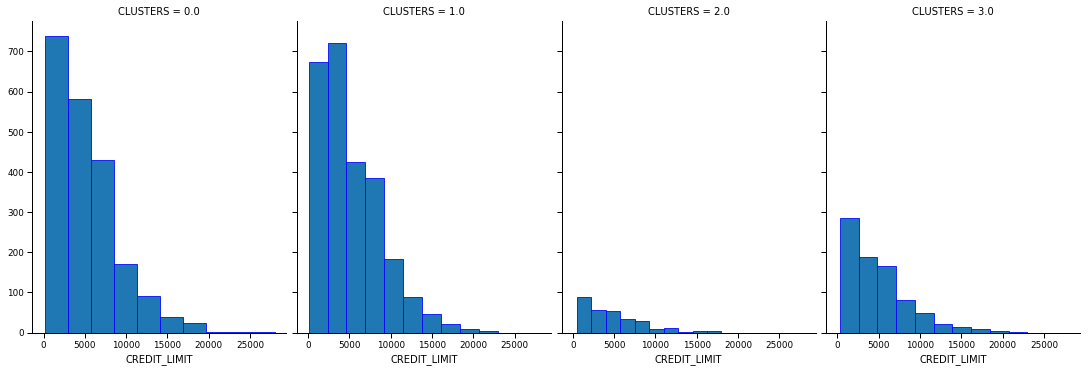

CREDIT_LIMIT


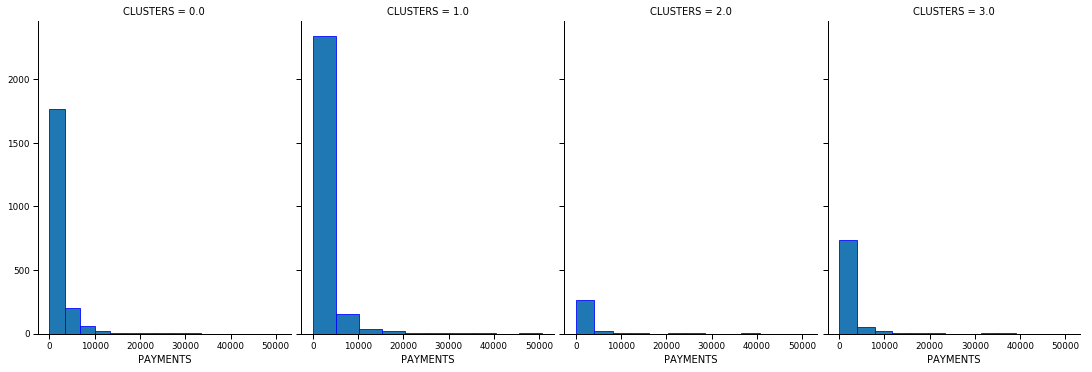

PAYMENTS


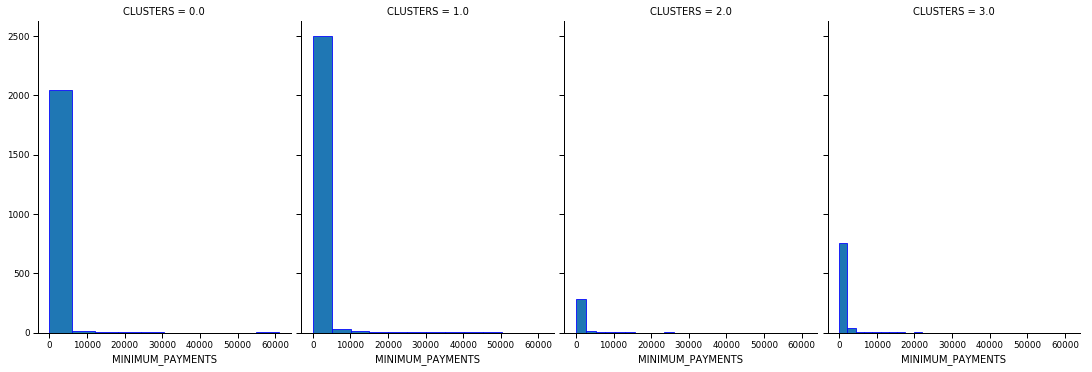

MINIMUM_PAYMENTS


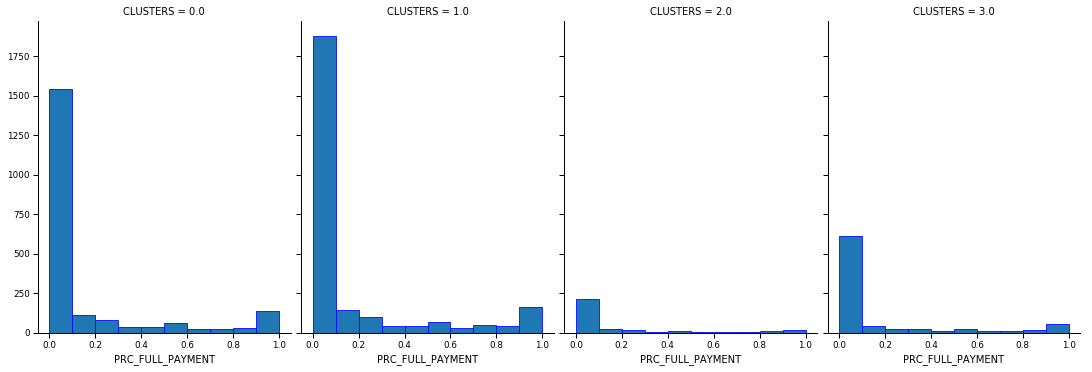

PRC_FULL_PAYMENT


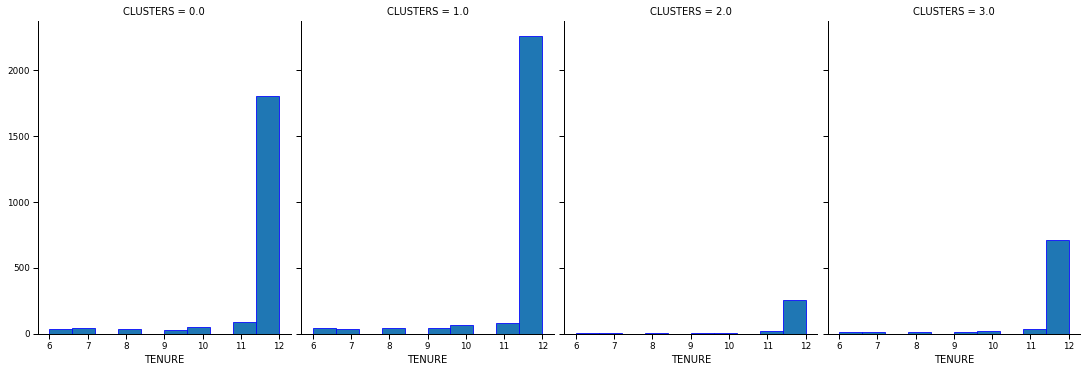

TENURE


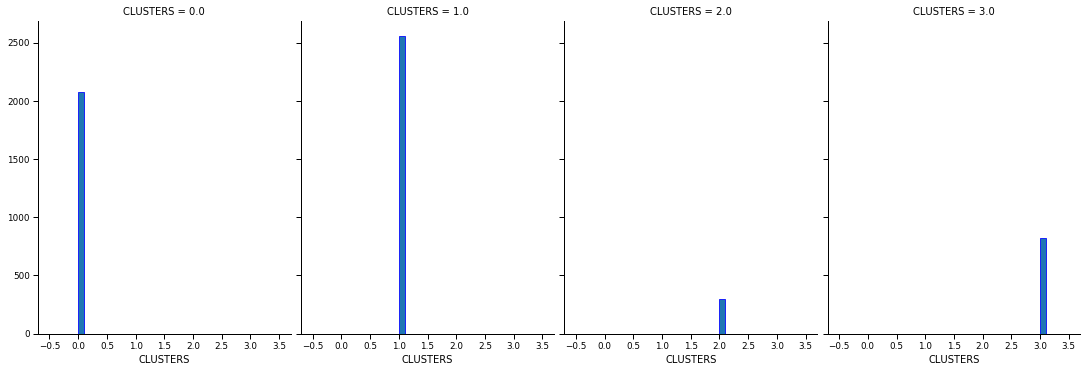

CLUSTERS


In [15]:
sns.set_context("paper", rc={"axes.labelsize":10,"font.size":1}) #font_scale=1,
for c in DF_Train:
    grid= sns.FacetGrid(DF_Train, col='CLUSTERS')
    grid.map(plt.hist,c,edgecolor="b")
    grid.fig.set_figheight(5) #worked
    grid.fig.set_figwidth(15) #this didnt work  
    plt.tight_layout()
    plt.show()
    print(c)
    

**Visualization of Clusters**

In [16]:
PCA_df_Train[["PCA_1","PCA_2","CLUSTERS"]].head()

,PCA_1,PCA_2,CLUSTERS
0,-0.30199,0.07588,1
1,-1.38055,1.14024,1
2,1.31200,-1.87441,0
3,0.86659,2.03751,3
4,0.10125,-1.78463,0


In [17]:
for x in range(0,4,1):
    print(x,len(PCA_df_Train[PCA_df_Train["CLUSTERS"]==x]))
print(len(PCA_df_Train["CLUSTERS"]))

0 2574
1 3213
2 363
3 1010
7160


<Figure size 2880x1152 with 0 Axes>

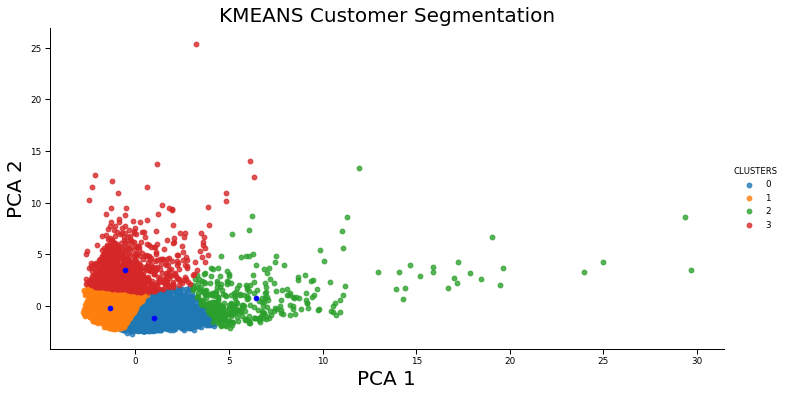

In [18]:
#sns.scatterplot(df,hue="label")
plt.figure(figsize=(40,16))
sns.lmplot("PCA_1","PCA_2",data=PCA_df_Train,fit_reg=False,hue='CLUSTERS',height=5,aspect=2,x_jitter=.1)
plt.scatter(centroids[:,0],centroids[:,1],color="b")
plt.xlabel("PCA 1",fontsize=20)
plt.ylabel("PCA 2",fontsize=20)
plt.title("KMEANS Customer Segmentation",fontsize=20)
plt.show()

**Silhouette Score**

In [19]:
Sil_Score = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(PCA_df_Train[["PCA_1","PCA_2"]])
    Sil_Score.append([k, silhouette_score(PCA_df_Train[["PCA_1","PCA_2"]],kmeans.labels_)])

Sil_Score=np.array(Sil_Score)   

print(Sil_Score)

[[ 2.          0.47379063]
 [ 3.          0.45241193]
 [ 4.          0.40711329]
 [ 5.          0.40012748]
 [ 6.          0.39059438]
 [ 7.          0.3870092 ]
 [ 8.          0.36297965]
 [ 9.          0.37203967]
 [10.          0.38388253]
 [11.          0.37060348]
 [12.          0.37107468]
 [13.          0.3517122 ]
 [14.          0.35408485]]


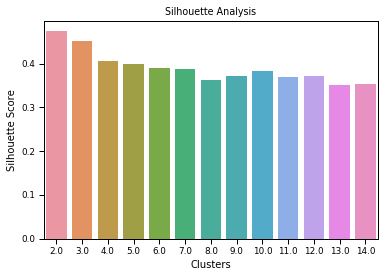

In [20]:
sns.barplot(Sil_Score[:,0],Sil_Score[:,1])
plt.title("Silhouette Analysis")
plt.ylabel("Silhouette Score")
plt.xlabel("Clusters")
plt.show()

**SPECTRUCAL CLUSTERING**

In [21]:
from sklearn.cluster import SpectralClustering 
# Building the clustering model 
spectral_model_NN = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_NN = spectral_model_NN.fit_predict(PCA_df_Train[["PCA_1","PCA_2"]])

In [22]:
PCA_df_Train["Clusters_SC"]=pd.Series(labels_NN)

In [23]:
for x in range(0,4,1):
    print(x,len(PCA_df_Train[PCA_df_Train["Clusters_SC"]==x]))
print(len(PCA_df_Train["Clusters_SC"]))

0 2141
1 1830
2 1354
3 1835
7160


<Figure size 2880x1152 with 0 Axes>

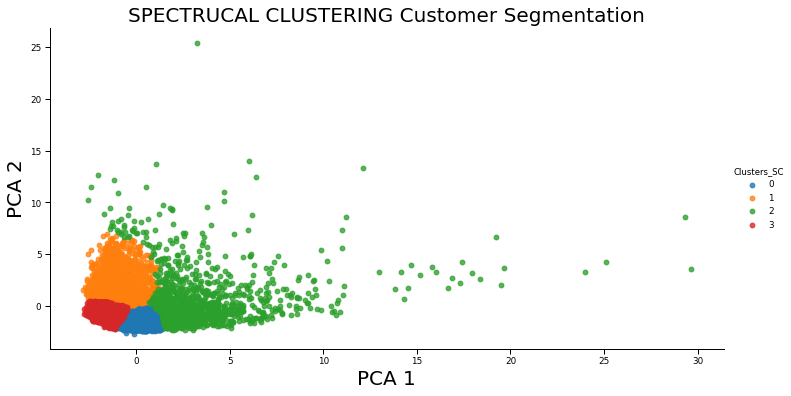

In [24]:
plt.figure(figsize=(40,16))
sns.lmplot("PCA_1","PCA_2",data=PCA_df_Train,fit_reg=False,hue='Clusters_SC',height=5,aspect=2,x_jitter=.1)
#plt.scatter(centroids[:,0],centroids[:,1],color="b")
plt.xlabel("PCA 1",fontsize=20)
plt.ylabel("PCA 2",fontsize=20)
plt.title("SPECTRUCAL CLUSTERING Customer Segmentation",fontsize=20)
plt.show()

In [25]:
#Spectrucal Clustering
Sil_Score = []


Sil_Score.append(silhouette_score(PCA_df_Train[["PCA_1","PCA_2"]],labels_NN))


Sil_Score=np.array(Sil_Score)   

print(Sil_Score)

[0.30452982]


In [26]:
#KMeans
Sil_Score = []

Sil_Score.append(silhouette_score(PCA_df_Train[["PCA_1","PCA_2"]],labels))

Sil_Score=np.array(Sil_Score)   

print(Sil_Score)

[0.40736739]


**MEANSHIFT**

In [27]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(PCA_df_Train[["PCA_1","PCA_2"]], quantile=0.2, n_samples=7160)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(PCA_df_Train[["PCA_1","PCA_2"]])
  
# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
centroids = ms.cluster_centers_


In [28]:
PCA_df_Train["Clusters_MS"]=pd.Series(labels)

In [29]:
for x in range(0,17,1):
    print(x,len(PCA_df_Train[PCA_df_Train["Clusters_MS"]==x]))
print(len(PCA_df_Train["Clusters_MS"]))

0 6635
1 320
2 10
3 13
4 45
5 106
6 2
7 10
8 8
9 2
10 2
11 1
12 1
13 1
14 1
15 1
16 2
7160


<Figure size 2880x1152 with 0 Axes>

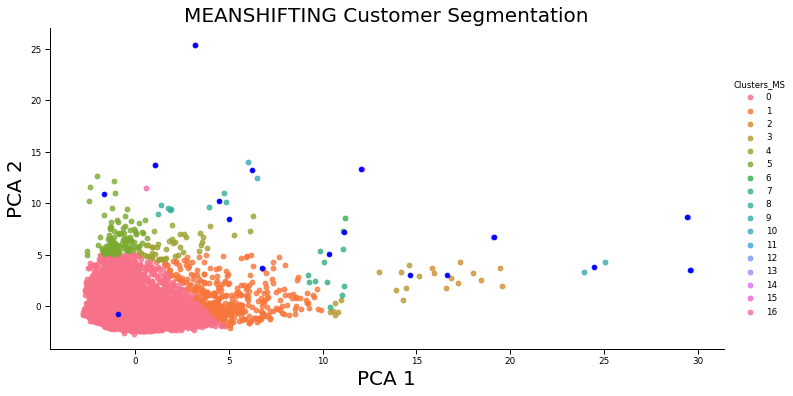

In [30]:
plt.figure(figsize=(40,16))
sns.lmplot("PCA_1","PCA_2",data=PCA_df_Train,fit_reg=False,hue='Clusters_MS',height=5,aspect=2,x_jitter=.1)
plt.scatter(centroids[:,0],centroids[:,1],color="b")
plt.xlabel("PCA 1",fontsize=20)
plt.ylabel("PCA 2",fontsize=20)
plt.title("MEANSHIFTING Customer Segmentation",fontsize=20)
plt.show()

In [31]:
#MeanShift Clustering
Sil_Score = []


Sil_Score.append(silhouette_score(PCA_df_Train[["PCA_1","PCA_2"]],labels))


Sil_Score=np.array(Sil_Score)   

print(Sil_Score)

[0.48325974]
